# E7: Introduction to Computer Programming for Scientists and Engineers

## Lab Assignment 12

For each question, you will have to fill in one or more Python functions. We provide an autograder with a number of test cases that you can use to test your function. Note that the fact that your function works for all test cases thus provided does necessarily guarantee
that it will work for all possible test cases relevant to the question. It is your responsibility
to test your function thoroughly, to ensure that it will also work in situations not covered
by the test cases provided

In [18]:
# Please run this cell, and do not modify the contents
import math
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate
np.seterr(all='ignore');
%matplotlib inline
# %run lab2_ag.py

# THE QUESTION TEXT HAS NOT BEEN CHANGED. TEXT EXAMPLES ARE GIVEN IN MATLAB STILL BUT SOLUTIONS ARE WRITTEN IN PYTHON
# In particular, there are many examples given in matlab that can be translated to python

## Predefined Functions:
Simplified syntax for python to get an ode45-equivalent function

In [6]:
def ode45(ode_fun, t_span, y0):
    '''
    TODO: implement variable timestep handling when len(t_span) == 2 to match MATLAB case
    Currently just defaults to using dt=3.76 if len(t_span)==2
    returns t, y
    '''
    ode45 = scipy.integrate.ode(ode_fun).set_integrator('dopri5') 
    ode45.set_initial_value(y0, t_span[0])
    y = [y0]
    dt = 3.76
    if (len(t_span)==2):
        t = [t_span[0]]
        while (ode45.successful() and t[-1]<t_span[1]-dt):
            y.append(ode45.integrate(t[-1]+dt)[0])
            t.append(t[-1]+dt)
    else:
        t = t_span
        for i in range(len(t_span) - 1):
            y.append(ode45.integrate(t_span[i+1])[0])
    return np.array(t), np.array(y)

## Question 1: Thermal Dynamics of a Building

When designing a building, it is important to be able to model how the outdoor ambient
temperature influences the temperature inside the building. To save electricity, energy en-
gineers will model several proposed building designs and decide which design would be the
most efficient for a given climate. The most important design aspects are often the selection
of the HVAC (heating, ventilation, and air conditioning) equipment, the building materials
to be used, the orientation of the building, and the window to wall ratio. In this problem,
we consider only the building materials and the outdoor ambient temperature to determine
the temperature inside a building. Today, well-designed, highly controlled, well-integrated
buildings like these are often referred to as "Smart Buildings".

In this question, we will use a simplified model of a building, represented in Figure 1.

<img src="resources/E7_Lab12_1.jpg" style="width: 350px;"/>
<center>*Figure 1: Schematic of Building*</center>

Here, $t$ is the time, $T_A(t)$ is the outdoor ambient temperature in degrees Fahrenheit, given by
equation 1, $T(t)$ is the indoor temperature in degrees Fahrenheit, $R$ is the thermal resistance
of the wall, in $\frac{^\circ \text{F hr}}{\text{Btu}}$ , and $C$ is the thermal capacitance of the wall, in $\frac{\text{Btu}}{^\circ \text{F}}$. $\text{Btu}$ is a unit of
work and stands for British Thermal Unit, as commonly used in the energy industry. For
this problem we will represent the diurnal cycle of the ambient outdoor temperature with a
Gaussian function:

$$T_A(t) = 60^\circ F + \frac{10^\circ \text{F hr}}{\sigma \sqrt{2\pi}} \exp\Big(\ \frac{-(t-\mu)^2}{2\sigma^2}\Big) \;\; (1)$$

where $T_A$ is the ambient temperature in degrees Fahrenheit, $t$ is the time of day in hours
(between 0 and 24), $\sigma$ = 1 hr, and $\mu$ = 12 hr. Figure 2 shows $T_A$ versus time of day.

<img src="resources/E7_Lab12_2.jpg" style="width: 500px;"/>
<center>*Figure 2: Daily profile of the ambient outdoor air temperature, TA(t).*</center>

We model the thermal dynamics of the building given by the interaction between the ambient
temperature and the indoor temperature with the following governing equation:

$$\frac{dT(t)}{dt} = \frac{1}{RC}(T_A(t)-T(t)) \qquad\qquad(2)$$

given the initial temperature $T(0) = T_0$. We assume that no heating or air conditioning is
running, so in this problem the only controllable design aspects are the properties of the
building materials, $R$ and $C$.

You do not have to do any unit conversion for this problem (1.1 and 1.2) as all the quantities
will be given with consistent units.

### 1.1: Euler's Method

In this question, we will use Euler's method to calculate an approximate solution to Equation 2. Using Euler's method, one can estimate the solution of Equation 2 at time $t_{i+1}$ knowing
the solution at time $t_i$:

$$T(t_{i+1}) \approx T(t_i) + \frac{dT}{dt}\Big|_{t_i} \Delta t \qquad\qquad (3)$$

where $\Delta t = t_{i+1} -t_i$ is the time step and $\frac{dT}{dt}\Big|_{t_i}$ is given by Equation 2. In this problem we use a constant time step when using Euler's method (i.e. $\Delta t = t_3 - t_2 = t_2 - t_1 = t_{k+1}-t_k)$.

Write a function `myEulerApprox(delta_t, T 0, R, C)` returning `(T_euler, t_euler)`,
where `delta_t`, `T_0`, `R`, and `C` are scalars of class double. `delta_t` ($\Delta t$ in Equation 3) is the
time step, in units of hours. `T_0` is the initial condition (i.e. temperature $T(t = 0)$ at time
zero) in $^\circ F$ inside the building. $R$ is the thermal resistance of the wall in $\frac{^\circ \text{F hr}}{\text{Btu}}$. `C` is the thermal
capacitance of the wall in $\frac{\text{Btu}}{^\circ \text{F}}$. Your function should use Euler's method to solve Equation 2
over the time period 0 to 24 hours, using a constant time step of `delta_t` hours. The ambient
outdoor air temperature $T_A$ is given by Equation 1. The function's outputs `T_euler` and
`t_euler` represent the temperature in $^\circ \text{F}$ in the building estimated using Euler's method,
and the time of day in hours at which temperature is estimated. `T_euler` and `t_euler`
should be arrays of class double and size $(\frac{24}{\Delta t} + 1) \times 1$. You can assume that `delta_t` is such
that the array `0:delta_t:24` contains the value 24.

In [7]:
def myEulerApprox(delta_t, T_0, R, C):
    ''' 
    returns T_euler, t_euler
    Inputs:
    delta_t: scalar, time-step of the Euler method (hours)
    T_0: scalar, initial temperature in the building (°F)
    R: scalar, thermal resistance of 1 sq.ft of wall (°F.hr/BTU)
    C: scalar, thermal capacitance of 1 sq.ft of wall (BTU/°F)
    
    Outputs:
    T_euler: vector of size (24/delta_t+1)x1, temperature in the building as
    estimated by Euler's method (°F)
    t_euler: vector of size (24/delta_t+1)x1, time steps at which the
    temperature is evaluated (hours)

    The function evaluates the temperature inside a building using Euler's
    method to approximate the solution of the governing ODE. A Gaussian
    distribution of the external temperature is used.
    t_euler=(0:delta_t:24)'; MATLAB SYNTAX
    t_euler = np.linspace(0,24,24/delta_t + 1) PYTHON SYNTAX
    '''
    
    # converting to python linspace
    # note that this will not exactly match MATLAB syntax (0:delta_t:24) if it does not contain 24
    # this is a potential issue due to endpoint exclusion by np.arange function
    t_euler = np.linspace(0,24,24/delta_t + 1)
    
    
    T_min = 60
    Amp = 10
    sigma = 1
    mu = 12
    Ta = (Amp/(sigma*np.sqrt(2*np.pi)))*np.exp(-(np.square(t_euler-mu)/2*np.square(sigma))) + T_min
    
    # implement Euler's method
    T_euler = np.zeros(len(t_euler));
    T_euler[0]=T_0;
    for i in range(len(T_euler) - 1):
        T_euler[i+1]=T_euler[i]+(delta_t/(R*C))*(Ta[i]-T_euler[i])
        
    return T_euler, t_euler

## Published Test Case

In [8]:
T_euler, t_euler = myEulerApprox(1,70,2,10)
print("T_Euler: \n", T_euler)
print("t_euler: \n", t_euler)

T_Euler: 
 [ 70.          69.5         69.025       68.57375     68.1450625
  67.73780938  67.35091891  66.98337296  66.63420506  66.30256172
  65.98964956  65.71716256  65.5522898   65.47414645  65.32142449
  65.08234875  64.83044723  64.58899179  64.35954294  64.1415658
  63.93448751  63.73776313  63.55087498  63.37333123  63.20466467]
t_euler: 
 [  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.
  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.]


/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:26: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


## Additional Test Case

In [9]:
T2, t2 = myEulerApprox(2,65,2,10)
print("T_Euler2: \n", T2)
print("t_euler2: \n", t2)

T_Euler2: 
 [ 65.          64.5         64.05        63.645       63.28050001
  62.95258384  62.71131642  62.83912706  62.60920532  62.34841862
  62.11357676  61.90221908  61.71199718]
t_euler2: 
 [  0.   2.   4.   6.   8.  10.  12.  14.  16.  18.  20.  22.  24.]


/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:26: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


### 1.2: Python's ODE Solver

In this question, we will solve the same ordinary differential equation as in the previous
question, but this time using Python's `ode45` solver, which uses a higher-order Runge-Kutta
formula. 

Write a function `myODESolver(delta_t, T 0, R, C)` returning `(T, t, range)`.
`delta_t`, `T_0`, `R`, and `C` are the same as for function `myEulerApprox`. Your function
should use Python's `ode45` solver to solve Equation 2 over the time period 0 to 24 hours,
using a constant time step specified by `delta_t`. The function's outputs `T` and `t` represent
the temperature in $^\circ \text{F}$ in the building estimated by Python's `ode45` solver, and the time of
day in hours at which temperature is estimated. `T` and `t` should be arrays of class double
and size $(\frac{24}{\Delta t} + 1) \times 1$. You can assume that `delta_t` is such that the array `0:delta_t:24`
contains the value 24. The function's output range should be an array of class double and
size $1 \times 2$ which contains the minimum and maximum temperatures (in that order) in $^\circ \text{F}$
experienced in the building during the 24-hour simulated time window.

We can compare the result of Python's `ode45` solver with our results from Euler's method by
plugging in the same test values into both functions and plotting them against each other
(we will look more into assessing the discrepancies between solution methods in the next
problem):

```MATLAB
>> [T euler, t euler] = myEulerApprox(1, 70, 2, 10);
>> [T, t, range] = myODESolver(1, 70, 2, 10);
>> figure;
>> plot(t euler, T euler, t, T);
```

<img src="resources/E7_Lab12_3.jpg" style="width: 500px;"/>
<center>*Figure 3: Euler's Method vs. Matlab ODE Solver for problem 1*</center>


In [10]:
def myODESolver(delta_t, T_0, R, C):
    '''
    returs T, t_euler
    Inputs:
    delta_t: scalar, time-step for solving the ODE (hours)
    T_0: scalar, initial temperature in the building (°F)
    R: scalar, thermal resistance of 1 sq.ft of wall (°F.hr/BTU)
    C: scalar, thermal capacitance of 1 sq.ft of wall (BTU/°F)

    Outputs:
    T: vector of size (24/delta_t+1)x1, temperature in the building as
    estimated by ode45 (°F)
    t_euler: vector of size (24/delta_t+1)x1, time steps at which the
    temperature is evaluated (hours)
    range: vector of size 1x2, containing the minimum and maximum values
    reached by T during the time period t (°F)

    The function evaluates the temperature inside a building using MATLAB's
    ODE solver ode45. A Gaussian distribution of the external temperature
    is used.
    '''
    t = np.linspace(0,24,24/delta_t + 1)
    
    def myTa(t):
        '''
        This sub-function calculates the external air temperature distribution, based on a Gaussian model
        '''
        T_min = 60
        Amp = 10
        sigma = 1
        mu = 12
        Ta = (Amp/(sigma*np.sqrt(2*np.pi)))*np.exp(-(np.square(t-mu))/(2*np.square(sigma))) + T_min
        return Ta
    
    # Python equivalent to ode45 see predefined function above
    t, T = ode45(lambda t,y: (1/(R*C))*(myTa(t)-y), t, T_0)
    range_T = (min(T), max(T))
    return T, t, range_T

## Published Test Case

In [11]:
T, t, range_T = myODESolver(2, 65, 2, 10)
print("Temperature: \n", T)
print("Time: \n", t)
print("Range: \n", range_T)

Temperature: 
 [ 65.          64.52418709  64.09365377  63.70409111  63.35161664
  63.04378924  62.98438152  62.92431739  62.65650033  62.40371612
  62.17497229  61.96799631  61.7807167 ]
Time: 
 [  0.   2.   4.   6.   8.  10.  12.  14.  16.  18.  20.  22.  24.]
Range: 
 (61.780716700213858, 65.0)


/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:22: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


## Additional Test Case

In [12]:
T2, t2, range_T2 = myODESolver(1, 70, 2, 10)
print("Temperature: \n", T2)
print("Time: \n", t2)
print("Range: \n", range_T2)

Temperature: 
 [ 70.          69.51229425  69.04837418  68.60707976  68.18730753
  67.78800783  67.40818221  67.04688104  66.70321613  66.37694699
  66.07647258  65.84679024  65.72844617  65.61520848  65.40724729
  65.15387301  64.903151    64.66403662  64.43656901  64.22019499
  64.01437365  63.81859033  63.63235549  63.45520342  63.28669116]
Time: 
 [  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.
  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.]
Range: 
 (63.286691159260577, 70.0)


/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:22: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


## Comparison Figure:

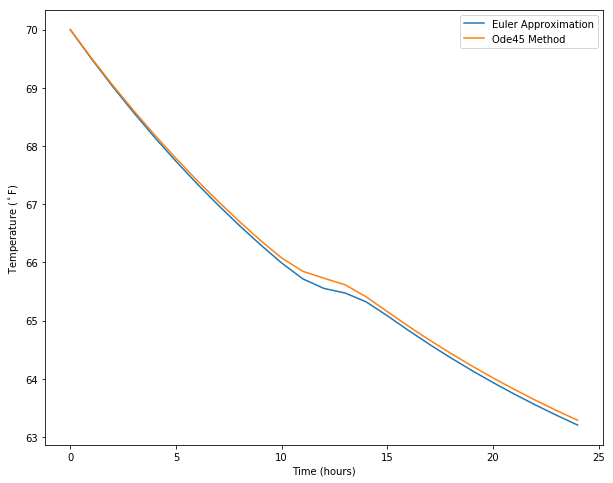

In [13]:
plt.figure(figsize=(10,8))
plt.plot(t_euler, T_euler, label='Euler Approximation')
plt.plot(t2, T2, label='Ode45 Method')
plt.xlabel('Time (hours)')
plt.ylabel('Temperature ($^\circ$F)')
plt.legend()

## Question 2:

Particulate matter air pollution is associated with adverse health effects, including respiratory and cardiovascular diseases and cancer. Airborne particulate matter consists of small
(from about 1 nm to about 100 $\mu$m in diameter) liquid and/or solid particles suspended in
air. There are many sources of particulate matter, both indoor and outdoor. Examples of
outdoor sources of particulate matter include diesel internal combustion engines and power
plants. Examples of indoor sources of particulate matter include cooking and lighted candles.

The particle mass concentration is the mass of particles per unit volume of air. In this
problem, we will only consider particles whose diameter is smaller than 2.5 $\mu$m. The mass
concentration of these particles is often referred to as $\text{PM}_{2.5}$ (which stands for "particulate
matter < 2.5 $\mu$m"). In what follows, we use the term "particle mass concentration" to
refer to $\text{PM}_{2.5}$ (although in the general case $\text{PM}_{2.5}$ is only a part of the total particle mass
concentration). In this problem, we will estimate the particle mass concentration inside a
house before, during, and after indoor emission events such as cooking.

In the model that we will use, the particle mass concentration in the house depends on: 

- the volume of the house
- the ventilation system of the house
- the particle mass concentration of the air brought in by the ventilation system
- the initial particle mass concentration in the house
- the rate of deposition of particles onto surfaces (e.g. onto walls)
- and the rate of emissions of particles inside the house. 

Figure 4 represents the different processes that
influence the particle mass concentration inside the house.

<img src="resources/E7_Lab12_4.png" style="width: 400px;"/>
<center>*Figure 4: Model representation of a house for analyzing indoor air quality.*</center>

We make the following assumptions:
    
- The air inside the house is well-mixed. A consequence of this assumption is that, at any
given time $t$, the value of the particle mass concentration $C(t)$ is the same everywhere
inside the house.
- The ventilation system of the house brings in air from the outside at a constant volumetric 
flow rate of $Q$, and expels air from the house to the outside at the same constant
volumetric 
flow rate $Q$. Volumetric 
flow rate is expressed as $\text{volume/time}$, and in this
problem you can think of this 
flow as the volume of air entering or leaving the house
per minute (in units of $\text{m}^3/\text{min}$).
- The particle mass concentration $C_{\text{vent}}$ of the air brought into the house by the ventilation system is constant with time.
- The emission rate of particles $E$ from cooking can vary with time $t$.
- The rate of deposition of particles onto the surfaces (e.g. onto walls) can be described
by a first-order loss process with rate constant $\beta$, which is assumed constant with time.
- We neglect any process not mentioned above. For example we neglect particle coagulation.
- The volume of air $V$ inside the house is constant.
- The particle mass concentration at the initial time $t_0$ is $C_0$.

Using the principle of conservation of mass and the assumptions listed above, one can write
the following first-order ordinary differential equation, which describes the time rate of
change of particle mass concentration C in the house:

$$\frac{dC}{dt} = \frac{Q}{V}C_{\text{vent}} + \frac{E}{V} - \frac{Q}{V}C - \beta C \qquad\qquad (4)$$

with the following initial condition:

$$C(t_0) = C_0 \qquad \qquad (5)$$

Note that in the ordinary differential equation above (Equation 4) and its initial condition
(Equation 5):

- $C$ is the unknown function. $C$ is a function of time $t$
- $Q$, $V$ , $\beta$, $C_{\text{vent}}$, $t_0$, and $C_0$ are known constants and
- $E$ is a known function of time $t$.

You do not have to do any unit conversion for this problem (2.1 and 2.2) as all the quantities
will be given with consistent units.

### 2.1: Without indoor emissions

First, we assume that there are no indoor emissions of particulate matter. In other words,
we assume that $E(t) = 0$ for all times $t$. In this case, the analytical solution of Equation 4
given the initial condition (Equation 5) is given by:

$$C(t) = \frac{Q}{V}\tau C_{\text{vent}} + (C_0-\frac{Q}{V}\tau C_{\text{vent}})e^{-(t-t_0)/\tau} \qquad\qquad (6)$$

with:

$$\tau = \frac{V}{Q+\beta V} \qquad\qquad (7)$$

Write a function `myAirQualityNoEmissions(V, Q, beta, C vent, t span, C0)` returning `(t_out, C_ode45, C_analytic, ME, RMSE)`.

Your function should calculate the particle mass concentration inside the house over a specified period of time. The input and output arguments of the function are described below:

- `V` is a scalar of class double. `V` ($V$ in Equation 4) is the volume of the house. The
units of `V` will be $\text{m}^3$.
- `Q` is a scalar of class double. `Q` ($Q$ in Equation 4) is the volumetric 
ow rate of air
through the house imposed by the ventilation system. The units of `Q` will be $\text{m}^3 \text{min}^{-1}$.
- `beta` is a scalar of class double. `beta` ($\beta$ in Equation 4) is the rate constant of the
first-order deposition of particles onto surfaces (e.g. onto walls). The units of $\beta$ will
be $\text{min}^{-1}$.
- `C_vent` is a scalar of class double. `C_vent` ($C_{\text{vent}}$) in Equation 4) is the particle mass
concentration in the air brought into the house by the ventilation system. The units
of `C_vent` will be $\mu g\text{m}^{-3}$.
- `t_span` is a $1 \times 2$ vector of class double. The two values of `t_span` indicate the initial
and final times (in that order) of the period of time over which the particle mass
concentration must be calculated. The units of the values of `t_span` will be minutes.
Matlab's `ode45` solver will determine at which specific values of times the particle mass
concentration in the house will be calculated.
- `C0` (the second character in the variable name is a zero) is a scalar of class double.
`C0` ($C_0$ in Equation 5) is the particle mass concentration inside the house at time
`t_span(1)`. The units of `C0` will be $\mu g \text{m}^{-3}$.
- `t_out`, `C_ode45`, and `C_analytic` are column vectors of class double. These three
output arguments should have the same size. `t_out` and `C_ode45` are the vector of
times and the corresponding solutions, respectively, returned by the Matlab `ode45`
solver when used to solve Equation 4 (with $E = 0$) over the time span specified by
`t_span` and with the initial condition specified by `C0`. `C_analytic` is the particle mass
concentration inside the house calculated using the analytical solution (Equation 6)
for each time specified in the vector `t_out`. The units of `t_out` will be $\text{min}$ and the
units of `C_ode45` and `C_analytic` will be $\mu g \text{m}^{-3}$.
- `ME` and `RMSE` are scalars of class double that contain the mean error ($ME$) and the root
mean squared error ($RMSE$), respectively, between the numerical solution (`C_ode45`)
and the analytical solution (`C_analytic`).

$$\text{ME} = \frac{1}{m} \sum_{i=1}^m (C_{\text{numerical}}(t_i) - C_{\text{analytical}}(t_i)) \qquad\qquad (8)$$

$$\text{RMSE} = \sqrt{\frac{1}{m} \sum_{i=1}^m (C_{\text{numerical}}(t_i) - C_{\text{analytical}}(t_i))^2} \qquad\qquad (9)$$

In Equations 8 and 9, $m$ is the number of points (in time) for which we have values
of the solutions. $C_{\text{numerical}}$ and $C_{\text{analytical}}$ are the values of the numerical (from
`ode45`) and analytical (from Equation 6) solutions at time $t_i$.

You can test your function using the following test cases, which should produce a figure
similar to Figure 5. In these test cases, we consider a 20 $\text{m}^2$ ($\approx 215 \text{ft}^2$) studio with a $2.5 \text{m}
(\approx 8.2 \text{ft})$ ceiling height, which is not ventilated very well ($Q = 0.25 \text{m}^3 \text{min}^{-1}$). We set the
value of $C_{\text{vent}}$ to $15 \mu g \text{m}^{-3}$. We set the initial particle mass concentration inside the studio
to a fairly elevated level ($45 \mu g \text{m}^{-3}$) and see how long it takes for the indoor particle mass
concentration to reach equilibrium (i.e. how much time it takes to 
ush out the elevated
indoor particle mass concentration). We set $\beta = 0.01 \text{min}^{-1}$ and simulate a period of 300
minutes.

```MATLAB
>> V = 50; Q = 0.25; C vent = 15; beta = 0.01;
>> t span = [0, 300]; C0 = 45;
>> [t out, C ode45, C analytic, ME, RMSE] = ...
myAirQualityNoEmissions(V,Q,beta,C vent,t span,C0);
% Check the numerical values in your outputs against these:
>> t out(1:5)'
0 3.7678 7.5357 11.3035 15.0713
>> C ode45(1:5)'
45.0000 42.8020 40.7248 38.7617 36.9065
>> C analytic(1:5)'
45.0000 42.8020 40.7248 38.7617 36.9065
>> ME
􀀀2.6665e􀀀06
>> RMSE
9.9684e􀀀05
>> plot(t out, C analytic, 'b􀀀', t out, C ode45, 'ro')
>> xlabel('Time (minutes)')
>> ylabel('Particle mass concentration (fnmugg mˆf􀀀3g)')
```

We now increase the ventilation rate in the studio ($Q = 2 \text{m}^3 \text{min}^{-1}$) to simulate a well-ventilated studio, and see how this change influences the time it takes to flush out the
elevated indoor particle mass concentration.

```MATLAB
>> Q = 2;
>> [t out, C ode45, C analytic, ME, RMSE] = ...
myAirQualityNoEmissions(V,Q,beta,C vent,t span,C0);
% Check the numerical values in your outputs against these:
>> t out(1:5)'
0 1.3701 2.7402 4.1104 5.4805
>> C ode45(1:5)'
45.0000 42.8150 40.7746 38.8694 37.0904
>> C analytic(1:5)'
45.0000 42.8150 40.7747 38.8694 37.0904
>> ME
􀀀6.5186e􀀀05
>> RMSE
0.0023
>> hold on
>> plot(t out, C analytic, 'b􀀀􀀀', t out, C ode45, 'rs')
```

Finally, we set the initial particle mass concentration in the studio to zero. In this scenario,
the particle mass concentration in the studio increases with time.

```MATLAB
>> C0 = 0;
>> [t out, C ode45, C analytic, ME, RMSE] = ...
myAirQualityNoEmissions(V,Q,beta,C vent,t span,C0);
% Check the numerical values in your outputs against these:
>> t out(1:5)'
1.0e􀀀03 *
0 0.0837 0.1675 0.2512 0.3349
>> C ode45(1:5)'
1.0e􀀀03 *
0 0.0502 0.1005 0.1507 0.2009
>> C analytic(1:5)'
1.0e􀀀03 *
0 0.0502 0.1005 0.1507 0.2009
>> ME
2.6542e􀀀05
>> RMSE
3.4706e􀀀04
>> plot(t out, C analytic, 'b:', t out, C ode45, 'rˆ')
```

<img src="resources/E7_Lab12_5.jpg" style="width: 700px;"/>
<center>*Figure 5: Figure created by the test cases of Problem 2.1 (plus a legend box).*</center>

You do not have to submit any answer to the following questions to complete this assignment,
but you should think about the answers to improve your understanding of first-order ordinary
differential equations:
    
- On which parameter(s) does the final particle mass concentration (i.e. $C(t)$ as $t \rightarrow +\infty$)
depend? To answer this question, you can take the limit of Equation 6 as $t \rightarrow +\infty$.
You can also check your answer with Figure 5.

- Which parameter(s) control(s) how rapidly the particle mass concentration converges
to its final value?

In [14]:
def myAirQualityNoEmissions(V, Q, beta, C_vent, t_span, C0):
    """
    returns t_out,C_ode45,C_analytic,ME,RMSE
    Inputs:
    V: scalar, volume of the room (m3)
    Q: scalar, flow rate (m3/min)
    beta: scalar, surface deposition rate (/min)
    C_vent: scalar, concentration of particles brought by ventilation (μg/m3)
    t_span: either a 1x2 vector, initial and final times of the time period
    considered, or a 1xn vector containing all the time steps used
    to compute evaluate the final concentration (min)
    C0: scalar, initial concentration of particles in the room (μg/m3)
    
    Outputs:
    t_out: column vector, time steps used by ode45 (min)
    C_ode45: column vector having the same size as t_out, solution returned
    by ode45 (μg/m3)
    C_analytic: column vector having the same size as t_out, analytical
    solution (μg/m3)
    ME: scalar, mean error beteen the analytical solution and the numerical
    solution
    RMSE: scalar, root mean square error between the analytical solution and
    the numerical solution
    
    The function calculates the mass particle concentration in a room after a
    given period of time (without internal emissions), using MATLAB's ODE
    solver ode45 and an analytical expression of the solution
    """
    tau = V/(Q+beta*V)
    t_out, C_ode45 = ode45(lambda t,y: (Q/V)*(C_vent-y) - beta*y, t_span, C0)
    C_analytic = Q*C_vent*tau/V+(C0-Q*C_vent*tau/V)*np.exp(-(t_out-t_span[0])/tau)
    ME = (1/len(t_out))*sum(C_ode45-C_analytic)
    RMSE = np.sqrt((1/len(t_out)))*sum(np.square(C_analytic-C_ode45))
    return t_out, C_ode45, C_analytic, ME, RMSE

t_out_1_5=
 [  0.     3.76   7.52  11.28  15.04]
C_ode45_1_5=
 [ 45.          42.80643983  40.73317232  38.77360074  36.92149011]
C_analytic_1_5=
 [ 45.          42.80643983  40.73317232  38.77360074  36.92149011]
ME=  1.39255437182e-09
RMSE=  2.21715226521e-17
t_out_1_5=
 [  0.     3.76   7.52  11.28  15.04]
C_ode45_1_5=
 [ 45.          39.34428537  34.65787715  30.77465036  27.55695152]
C_analytic_1_5=
 [ 45.          39.34428534  34.65787699  30.77465011  27.5569512 ]
ME=  7.81749622591e-08
RMSE=  1.76289858672e-13
t_out_1_5=
 [  0.     3.76   7.52  11.28  15.04]
C_ode45_1_5=
 [ 0.          2.05662351  3.76077199  5.17285447  6.34292678]
C_analytic_1_5=
 [ 0.          2.05662351  3.760772    5.17285451  6.34292684]
ME=  -2.52656059685e-08
RMSE=  1.78430853497e-14


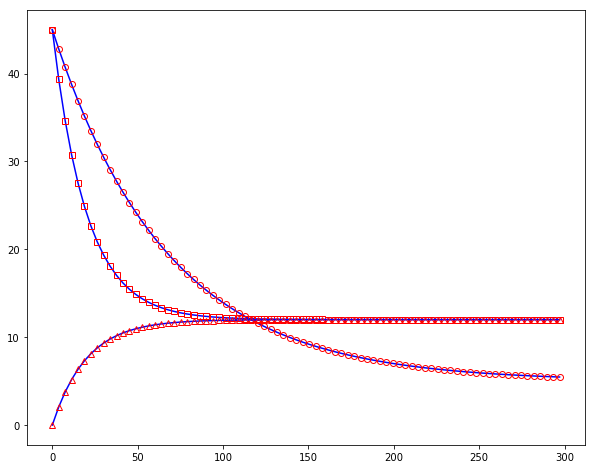

In [15]:
V = 50
Q = 0.25
C_vent = 15
beta = 0.01
t_span = [0, 300]
C0 = 45

t_out, C_ode45, C_analytic, ME, RMSE = myAirQualityNoEmissions(V,Q,beta,C_vent,t_span,C0)

print("t_out_1_5=\n", t_out[0:5])
print("C_ode45_1_5=\n", C_ode45[0:5])
print("C_analytic_1_5=\n", C_analytic[0:5])
print("ME= ", ME)
print("RMSE= ",RMSE)

plt.figure(figsize=(10,8))
plt.plot(t_out, C_analytic, 'b-')
plt.plot(t_out, C_ode45, 'ro',markerfacecolor='None')

Q = 2

t_out, C_ode45, C_analytic, ME, RMSE = myAirQualityNoEmissions(V,Q,beta,C_vent,t_span,C0)

print("t_out_1_5=\n", t_out[0:5])
print("C_ode45_1_5=\n", C_ode45[0:5])
print("C_analytic_1_5=\n", C_analytic[0:5])
print("ME= ", ME)
print("RMSE= ",RMSE)

plt.plot(t_out, C_analytic, 'b-')
plt.plot(t_out, C_ode45, 'rs',markerfacecolor='None')

C0 = 0

t_out, C_ode45, C_analytic, ME, RMSE = myAirQualityNoEmissions(V,Q,beta,C_vent,t_span,C0)

print("t_out_1_5=\n", t_out[0:5])
print("C_ode45_1_5=\n", C_ode45[0:5])
print("C_analytic_1_5=\n", C_analytic[0:5])
print("ME= ", ME)
print("RMSE= ",RMSE)

plt.plot(t_out, C_analytic, 'b-')
plt.plot(t_out, C_ode45, 'r^',markerfacecolor='None')

### 2.2: With indoor emissions

We now wish to analyze the impact of indoor emissions of particulate matter on the particle
mass concentration inside the house. We therefore no longer require that $E(t) = 0$ for all
times $t$. Depending on the form of the function $E$, the analytical solution of Equation 4
together with its initial condition (Equation 5) might not be known. Numerical methods are
often used to find approximate solutions of ordinary differential equations when the analytical
solution is unknown. Here we will model the emission rate function as a top-hat function,
defined by the three parameters $t_{\text{start}}$, $t_{\text{end}}$, and $E_{\text{value}}$ as (see Figure 6 for an illustration):

$$E(t) = \begin{cases} \end{cases}$$

Write a function `myAirQuality(V, Q, beta, C_vent, t_span, C0, t_start, t_end, E_value)` returning `(t_out, C_ode45)`

where:

- `V`, `Q`, `beta`, `C_vent`, `t_span`, and `C0` are the same as in Problem 2.1.
- `t_start`, `t_end`, and `E_value` are scalars of class double that represent $t_{\text{start}}$, $t_{\text{end}}$, and $E_{\text{value}}$ in Equation 10, respectively. The value of `E_value` will be given in units of $\mu g \text{min}^{-1}$.
- `t_span` can have one of two formats (your function should work for either):
     - The same as in Problem 2.1. In this case, Matlab's `ode45` solver will determine
    at which specific values of times the particle mass concentration in the house will
    be calculated.
    - A $N \times 1$ array of class double with $N > 2$ that contains the values of the times
    (in minutes) at which Matlab's `ode45` solver should calculate the particle mass
    concentration.
- `t_out` and `C_ode45` are column vectors of class double. These two output arguments
should have the same size. `t_out` and `C_ode45` are the vector of times and the corresponding solutions, respectively, returned by the Matlab function `ode45` when used to
solve Equation 4 for times specified by t_span, with the initial condition specified by
`C0`, and with the emission rate defined as the top-hat function discussed above.

<img src="resources/E7_Lab12_6.jpg" style="width: 600px;"/>
<center>*An illustration of the top-hat emission function used in Problem 2.2.*</center>


Hint: you may want to define a (sub)-function to calculate the emission rate $E(t)$ for a
given time $t$ and parameters $t_{\text{start}}$, $t_{\text{end}}$, and $E_{\text{value}}$.
You can find the function `myAirQualityAnalytic.m` (on bCourses) that calculates the analytical solution of Equation 4 together with its initial condition (Equation 5) when $E$ is the
top-hat function defined in Equation 10, with the additional assumption that $t_{\text{start}} > t_0$. 

See the comments in `myAirQualityAnalytic.m` and the test cases below for more information
about how to use this function, if you decide to use it (optional). It is provided to you if you
want to further investigate the performance of Matlab's `ode45` solver.

You can test your function using the following test cases, which should produce a figure
similar to Figure 7. We start with the same studio apartment as in the first test case of
Problem 2.1 when it is not ventilated very well ($Q = 0.25 \text{m}^3 \text{min}^{-1}$). We set $C_{\text{vent}}$ to the
same value as before. We set the initial particle mass concentration inside the house equal
to $C_{\text{vent}}$. We add an emission event with $t_{\text{start}} = 30 \text{min}$, $t_\text{end} = 45 \text{min}$, and $E_\text{value} = 100 \mu g \text{min}^{-1}$ to simulate a 15-minute cooking event.

```MATLAB
>> V = 50; Q = 0.25; C vent = 15; beta = 0.01; t span = [0, 300];
>> C0 = C vent; E start = 30; E end = 45; E value = 100;
>> [t out, C ode45] = myAirQuality(V, Q, beta, C vent, t span, ...
C0, E start, E end, E value);
>> t = linspace(t span(1), t span(2), 1000)';
>> C analytic = myAirQualityAnalytic(V, Q, beta, C vent, t span(1), ...
C0, E start, E end, E value, t);
% Check the numerical values in your outputs against these:
>> t out(10:15)'
26.7506 27.7471 28.7437 29.7403 30.7369 31.7335
>> C ode45(10:15)'
11.6948 11.5954 11.4976 11.4012 12.3755 14.3667
>> plot(t, C analytic, 'b􀀀', t out, C ode45, 'ro')
>> ylim([0, 40])
>> xlabel('Time (minutes)')
>> ylabel('Particle mass concentration (fnmugg mˆf􀀀3g)')
```

We now reduce the duration of the emission episode to 10 minutes.

```MATLAB
>> E end = 40;
>> [t out, C ode45] = myAirQuality(V, Q, beta, C vent, t span, ...
C0, E start, E end, E value);
>> C analytic = myAirQualityAnalytic(V, Q, beta, C vent, t span(1), ...
C0, E start, E end, E value, t);
% Check the numerical values in your outputs against these:
>> t out(10:15)'
57.5951 65.0951 72.5951 80.0951 87.5951 95.0951
>> C ode45(10:15)'
9.2150 8.7665 8.3658 8.0077 7.6876 7.4016
>> hold on
>> plot(t, C analytic, 'b􀀀􀀀', t out, C ode45, 'rs')
```

Note that for the above test case, Matlab's `ode45` solver fails remarkably in approximating
the solution to the differential equation (see Figure 7). We can partially fix this issue here
by forcing Matlab's `ode45` solver to use more time steps, which helps the solver pick up the
abrupt change in emissions due to the top hat function used:

```MATLAB
>> t ode45 = linspace(t span(1), t span(2), 301)';
>> [t out, C ode45] = myAirQuality(V, Q, beta, C vent, t ode45, ...
C0, E start, E end, E value);
>> plot(t out, C ode45, 'r.')
% Check the numerical values in your outputs against these:
>> t out(40:45)'
39 40 41 42 43 44
>> C ode45(40:45)'
27.7756 29.1628 29.9508 30.2649 30.2211 29.9219
```

We now increase the ventilation rate in the studio ($Q = 2 \text{m}^3 \text{min}^{-1}$) to simulate a well-
ventilated studio, and see how this change affects the particle mass concentration in the
studio.

```MATLAB
>> Q = 2;
>> [t out, C ode45] = myAirQuality(V, Q, beta, C vent, t span, ...
C0, E start, E end, E value);
>> C analytic = myAirQualityAnalytic(V, Q, beta, C vent, t span(1), ...
C0, E start, E end, E value, t);
% Check the numerical values in your outputs against these:
>> t out(10:15)'
28.7770 29.1623 29.5475 29.9327 30.3180 30.7032
>> C ode45(10:15)'
12.7125 12.6989 12.6856 12.6725 13.0723 13.8622
>> plot(t, C analytic, 'b:', t out, C ode45, 'rˆ')
```

Figure 7 illustrates how the solution calculated by Matlab's `ode45` solver can differ from the
analytical solution, especially when the solution and/or its derivative vary rapidly with time.
You should try to understand the results that are shown on Figure 7.

<img src="resources/E7_Lab12_7.jpg" style="width: 600px;"/>
<center>*Figure 7: Figure created by the test cases of Problem 2.2 (plus a legend box).*</center>


You do not have to submit any answer to the following questions to complete this assignment,
but you should think about the answers to improve your understanding of first-order ordinary
differential equations:

- How does the peak concentration in the studio change when the strength of the ventilation system ($Q$) changes? What about when the duration or strength of the emission episode vary?
- The solution of Equation 4 together with its initial condition (Equation 5) with $E$
defined as a top-hat function can be derived analytically. Try to derive it. Hint: write
three separate solutions: a solution that works for the time interval $t \le t_\text{start}$, then
a solution that works for the time interval $t_\text{start} < t \le t_\text{end}$, and then a solution that
works for the time interval $t > t_\text{end}$.

In [1]:
# def myAirQuality(V,Q,beta,C_vent,t_span,C0,t_start,t_end,E_value):
#     """
#     returns t_out, C_ode45
#     Inputs:
#     V: scalar, volume of the room (m3)
#     Q: scalar, flow rate (m3/min)
#     beta: scalar, surface deposition rate (/min)
#     C_vent: scalar, concentration of particles brought by ventilation (μg/m3)
#     t_span: either a 1x2 vector, initial and final times of the time period
#     considered, or a 1xn vector containing all the time steps used
#     to compute evaluate the final concentration (min)
#     C0: scalar, initial concentration of particles in the room (μg/m3)
#     t_start: scalar, internal emission event starting time (min)
#     t_end: scalar, internal emission event ending time (min)
#     E_value: scalar, internal emission event magnitude (μg/min)
    
#     Outputs:
#     t_out: column vector, time steps used by ode45 (min)
#     C_ode45: column vector having the same size as t_out, solution returned
#     by ode45 (μg/m3)
    
#     The function calculates the mass particle concentration in a room after a
#     given period of time (witho internal emissions), using MATLAB's ODE
#     solver ode45
#     """
#     def myE(t,t_start,t_end,E_value):
#         """
#         This sub-function calcultes the indoor emissions distribution assumed to
#         follow a top-hat behavior
#         """
#         if (t>t_start and t<=t_end):
#             E=E_value
#         else E=0
#         return E
#     # TODO: lambda function is not complete Solutions.pdf is cutoff
#     t_out, C_ode45 = ode45(lambda t,y: (Q/V)*(C_vent-y)-beta*y+myE(t,t_start,t_end,E_value)/)